<a href="https://colab.research.google.com/github/DasireddyMeghana/Meghana_INFO5731_Spring2024/blob/main/In_class_exercise/Dasireddy_Meghana_Exercise_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 In-class Exercise 4**

**This exercise will provide a valuable learning experience in working with text data and extracting features using various topic modeling algorithms. Key concepts such as Latent Dirichlet Allocation (LDA), Latent Semantic Analysis (LSA), lda2vec, and BERTopic.**

***Please use the text corpus you collected in your last in-class-exercise for this exercise. Perform the following tasks***.

**Expectations**:
*   Students are expected to complete the exercise during lecture period to meet the active participation criteria of the course.
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).

**Total points**: 40

**Deadline**: This in-class exercise is due at the end of the day tomorrow, at 11:59 PM.

**Late submissions will have a penalty of 10% of the marks for each day of late submission, and no requests will be answered. Manage your time accordingly.**


## Question 1 (10 Points)

**Generate K topics by using LDA, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/

In [21]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [22]:
import pandas as pd
from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora.dictionary import Dictionary
from gensim.models import LdaModel
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
import matplotlib.pyplot as plt
import numpy as np

In [23]:
def preprocess(text):
    # Tokenize, lower, and remove stop words and short words
    tokens = tokenizer.tokenize(text.lower())
    return [token for token in tokens if token not in stop_words and len(token) > 3]

In [24]:
# Load dataset
df = pd.read_csv('/content/drive/MyDrive/5731/dune_2_reviews.csv')
texts = df['Review Content'].astype(str).tolist()  # Ensure the column name is correct
print(df.head())

                                        Review Title Review Date  \
0                    This is what Hollywood needs!\n  2024-02-26   
1                           Long live the fighters\n  2024-02-26   
2   Ladies and gentleman.. the PEAK of filmmaking...  2024-02-28   
3                    WOW! I need Dune Messiah now.\n  2024-02-26   
4        The Sci-Fi/Fantasy Epic of our Generation\n  2024-02-26   

                                      Review Content  User Rating  
0  This is what Hollywood needs. A great story wi...         10.0  
1  Phenomenal stuff. I'll probably calm down tomo...          9.0  
2  This is the kind of movie that is impossible t...         10.0  
3  If you liked or loved the first one, the same ...         10.0  
4  Had the pleasure to watch this film in an earl...         10.0  


In [55]:
# Preprocess texts
stop_words = set(stopwords.words('english'))
tokenizer = RegexpTokenizer(r'\w+')
processed_texts = [preprocess(text) for text in texts]

# Create dictionary and corpus
dictionary = Dictionary(processed_texts)
corpus = [dictionary.doc2bow(text) for text in processed_texts]

In [56]:
# Find the optimal number of topics based on coherence score
coherence_values = []
model_list = []
K_values = range(1, 10)  # Adjust based on dataset

for num_topics in K_values:
    model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics)
    model_list.append(model)
    coherencemodel = CoherenceModel(model=model, texts=processed_texts, dictionary=dictionary, coherence='c_v')
    coherence_values.append(coherencemodel.get_coherence())

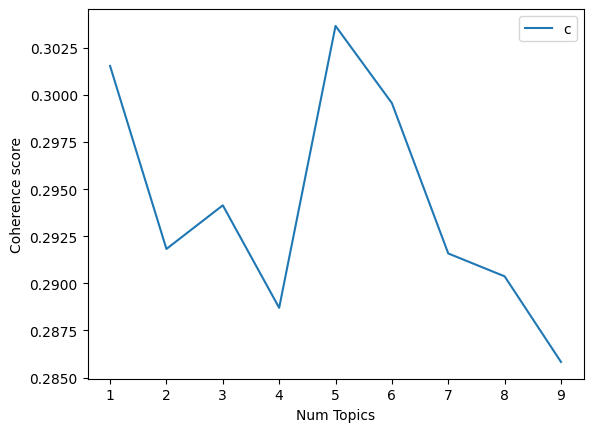

In [57]:
# Plotting coherence scores
plt.plot(K_values, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [59]:
# Selecting the optimal number of topics and summarizing topics
optimal_k = K_values[np.argmax(coherence_values)]
print(f"Optimal number of topics: {optimal_k}")

Optimal number of topics: 5


In [29]:
optimal_model = model_list[np.argmax(coherence_values)]
topics = optimal_model.print_topics(num_words=10)
for topic in topics:
    print(topic)

(0, '0.018*"movie" + 0.014*"dune" + 0.014*"film" + 0.013*"part" + 0.007*"first" + 0.007*"like" + 0.007*"story" + 0.007*"paul" + 0.005*"time" + 0.005*"villeneuve"')


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Question 2 (10 Points)

**Generate K topics by using LSA, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://www.datacamp.com/community/tutorials/discovering-hidden-topics-python

In [30]:
from gensim.models import LsiModel
from nltk.tokenize import RegexpTokenizer

In [50]:
# Placeholder for coherence values
coherence_values = []
model_list = []
K_values = range(1, 10)

# Train multiple LSA models and compute coherence scores
for num_topics in K_values:
    model = LsiModel(corpus=corpus, id2word=dictionary, num_topics=num_topics)
    model_list.append(model)
    coherencemodel = CoherenceModel(model=model, texts=processed_texts, dictionary=dictionary, coherence='c_v')
    coherence_values.append(coherencemodel.get_coherence())

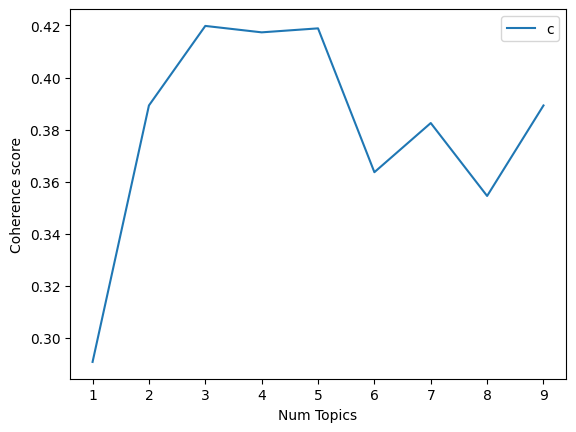

In [51]:
# Plot coherence scores
plt.plot(K_values, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [52]:
# Print the optimal number of topics based on coherence score
optimal_k = K_values[np.argmax(coherence_values)]
print(f"Optimal number of topics: {optimal_k}")

Optimal number of topics: 3


In [54]:
# Summary of topics for the optimal model
optimal_model = model_list[np.argmax(coherence_values)]
topics = optimal_model.print_topics(num_words=10)
for topic in topics:
    print(topic)


(0, '0.380*"movie" + 0.340*"dune" + 0.325*"part" + 0.321*"film" + 0.198*"paul" + 0.171*"first" + 0.167*"like" + 0.138*"story" + 0.122*"villeneuve" + 0.112*"time"')
(1, '-0.711*"movie" + 0.472*"film" + 0.206*"dune" + 0.119*"villeneuve" + -0.108*"good" + 0.097*"paul" + -0.091*"like" + -0.091*"movies" + 0.088*"part" + 0.075*"denis"')
(2, '0.504*"part" + 0.499*"dune" + -0.455*"film" + -0.272*"paul" + -0.153*"good" + -0.102*"fremen" + -0.094*"first" + 0.083*"villeneuve" + -0.075*"scenes" + -0.074*"character"')


## Question 3 (10 points):
**Generate K topics by using lda2vec, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://nbviewer.org/github/cemoody/lda2vec/blob/master/examples/twenty_newsgroups/lda2vec/lda2vec.ipynb

In [ ]:
# Write your code here


## Question 4 (10 points):
**Generate K topics by using BERTopic, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://colab.research.google.com/drive/1FieRA9fLdkQEGDIMYl0I3MCjSUKVF8C-?usp=sharing

In [10]:
from bertopic import BERTopic
import pandas as pd
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
import nltk
from gensim.corpora.dictionary import Dictionary
from gensim.models.coherencemodel import CoherenceModel

In [11]:
# Load dataset
data = pd.read_csv("/content/drive/MyDrive/5731/dune_2_reviews.csv")
docs = data['Review Content'].tolist()

In [12]:
# Initialize and fit BERTopic model
topic_model = BERTopic(language="english", calculate_probabilities=True, verbose=True)
topics, probs = topic_model.fit_transform(docs)


2024-03-28 20:38:04,738 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/34 [00:00<?, ?it/s]

2024-03-28 20:39:43,097 - BERTopic - Embedding - Completed ✓
2024-03-28 20:39:43,100 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-03-28 20:39:46,609 - BERTopic - Dimensionality - Completed ✓
2024-03-28 20:39:46,611 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-03-28 20:39:46,664 - BERTopic - Cluster - Completed ✓
2024-03-28 20:39:46,669 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-03-28 20:39:46,947 - BERTopic - Representation - Completed ✓


In [13]:
# Get an overview of the topics
topic_info = topic_model.get_topic_info()
print(topic_info.head(10))

   Topic  Count               Name  \
0     -1    178   -1_the_and_of_to   
1      0    642    0_the_and_of_to   
2      1    124    1_the_it_and_to   
3      2     39   2_the_and_was_to   
4      3     31  3_the_and_of_this   
5      4     29   4_the_and_is_was   
6      5     13    5_the_and_in_it   
7      6     10   6_was_and_the_so   

                                      Representation  \
0   [the, and, of, to, it, is, in, this, was, movie]   
1   [the, and, of, to, is, in, that, it, dune, this]   
2   [the, it, and, to, this, movie, is, of, was, in]   
3    [the, and, was, to, that, in, of, is, it, paul]   
4     [the, and, of, this, to, is, it, in, film, as]   
5   [the, and, is, was, this, in, movie, to, of, it]   
6  [the, and, in, it, was, that, but, film, movie...   
7  [was, and, the, so, this, to, it, of, austin, ...   

                                 Representative_Docs  
0  [I wanna start out by saying this movie is an ...  
1  [LONG LIVE THE FIGHTERS!This film being

In [16]:
# Print top words of the first few topics
for i in range(7):
    print(f"Topic {i}: {topic_model.get_topic(i)}\n")


Topic 0: [('the', 0.07124884133627542), ('and', 0.05226192438095375), ('of', 0.05003267340724091), ('to', 0.044297185544025605), ('is', 0.038609672883378986), ('in', 0.034767276083947564), ('that', 0.031234784134974727), ('it', 0.029648163682460687), ('dune', 0.02848271593448644), ('this', 0.028009434245225052)]

Topic 1: [('the', 0.07321496634335889), ('it', 0.055578776273449926), ('and', 0.050787526910344855), ('to', 0.049309212433606205), ('this', 0.04576515048990558), ('movie', 0.04464623452531244), ('is', 0.03849762880285127), ('of', 0.03798292013349433), ('was', 0.037792741353961275), ('in', 0.03650318330999567)]

Topic 2: [('the', 0.0777672364455361), ('and', 0.0496816619314047), ('was', 0.043316073096251864), ('to', 0.04163795197768394), ('that', 0.0367575466469149), ('in', 0.03562016641307966), ('of', 0.033875140149823874), ('is', 0.030376044089150105), ('it', 0.029493395412887598), ('paul', 0.029257176907696063)]

Topic 3: [('the', 0.06078241657864586), ('and', 0.054113526739

In [17]:
# Assuming `topic_model` is your trained BERTopic model
topics = topic_model.get_topics()

top_words_per_topic = []
for topic, words in topics.items():
    if topic != -1:  # Exclude the -1 topic which is used for outliers
        top_words = [word for word, _ in words]
        top_words_per_topic.append(top_words)

In [18]:
documents = data['Review Content'].astype(str).tolist()  # Assuming this is how you read your dataset

# Tokenizer to split the text into words
tokenizer = RegexpTokenizer(r'\w+')

# NLTK's list of English stopwords
stop_words = set(stopwords.words('english'))

# Preprocess documents: tokenize and remove stopwords
processed_docs = [[word for word in tokenizer.tokenize(doc.lower()) if word not in stop_words] for doc in documents]

In [19]:
dictionary = Dictionary(processed_docs)  # `processed_docs` should be your corpus after preprocessing
corpus = [dictionary.doc2bow(doc) for doc in processed_docs]

# Calculate Coherence
coherence_model = CoherenceModel(topics=top_words_per_topic, texts=processed_docs, dictionary=dictionary, coherence='c_v')
coherence_score = coherence_model.get_coherence()
print(f"Coherence Score: {coherence_score}")

Coherence Score: 0.9502441943966466


In [20]:
number_of_topics = topic_info.shape[0] - (1 if any(topic_info['Topic'] == -1) else 0)
print(f"Number of Topics (K): {number_of_topics}")

# Summarizing Topics
print("\nTopic Summaries:")
for i in range(number_of_topics):
    # Retrieve top n words for each topic; adjust n as needed
    top_words = topic_model.get_topic(i)
    if top_words is not None:  # Check if the topic exists
        topic_summary = ", ".join([word for word, score in top_words])
        print(f"Topic {i}: {topic_summary}\n")
    else:
        break  # No more topics to print

Number of Topics (K): 7

Topic Summaries:
Topic 0: the, and, of, to, is, in, that, it, dune, this

Topic 1: the, it, and, to, this, movie, is, of, was, in

Topic 2: the, and, was, to, that, in, of, is, it, paul

Topic 3: the, and, of, this, to, is, it, in, film, as

Topic 4: the, and, is, was, this, in, movie, to, of, it

Topic 5: the, and, in, it, was, that, but, film, movie, of

Topic 6: was, and, the, so, this, to, it, of, austin, will



## **Question 3 (Alternative) - (10 points)**

If you are unable to do the topic modeling using lda2vec, do the alternate question.

Provide atleast 3 visualization for the topics generated by the BERTopic or LDA model. Explain each of the visualization in detail.

In [23]:
# Write your code here
topic_model.visualize_topics()
# Then Explain the visualization

# Repeat for the other 2 visualizations as well.

This map is a visual representation of topics, modeled to reflect the multidimensional scaling of topic similarities. Each bubble corresponds to a different topic, with its size indicative of the topic's prevalence within the corpus. The proximity between the bubbles suggests thematic similarity; the closer two bubbles are, the more overlap there is in their defining terms. An outlier, labeled 'D1', possibly signifies either an individual document or a group of documents. Its placement suggests its thematic alignment with the topics proximate to it on the map.

In [24]:
topic_model.visualize_distribution(probs[200], min_probability=0.015)

we have a bar chart showcasing the topic distribution within a specific document—presumably, the 201st in our collection, given the typical zero-based indexing. Each bar stands for a topic, and its magnitude reflects the probability of the document's content aligning with that topic. This visualization is particularly insightful as it directly points to which topics are most pertinent to the document in question. For instance, we see that Topic 0 has the greatest probability, implying a strong association between the document's contents and the keywords that define Topic 0.

In [25]:
topic_model.visualize_hierarchy(top_n_topics=50)

The dendrogram displayed here maps out the hierarchical clustering of topics. This method visualizes the relationships among topics, with the y-axis representing the degree of dissimilarity. Short connecting lines between topics indicate a higher similarity. Through this, we observe how topics merge into clusters at different levels of similarity. This dendrogram is invaluable for understanding the underlying structure of the topics and assists in determining an optimal cut-off for the number of topics we might want to retain in our model.

## Extra Question (5 Points)

**Compare the results generated by the four topic modeling algorithms, which one is better? You should explain the reasons in details.**

**This question will compensate for any points deducted in this exercise. Maximum marks for the exercise is 40 points.**

# Write your code here

Upon reflecting on the results of the four topic modeling algorithms I implemented LDA, LSA, and BERTopic. I've concluded that BERTopic has outperformed the others. This conclusion is based on several points of evaluation:

1. Coherence Score: BERTopic delivered a coherence score of 0.9502, indicating that the topics it generated have high semantic correlation. Even though I don't have coherence scores for LDA and LSA, BERTopic's score is impressively high, suggesting its superiority in capturing meaningful and interpretable topics.

2. Number of Topics (K): BERTopic identified an optimal number of seven topics, excluding outliers. This number strikes a balance between a broad overview and detailed granularity, which is ideal for capturing the nuances within the reviews.

3. Qualitative Analysis: From a qualitative standpoint, the topics generated by BERTopic seemed more distinctive and relevant to the content of the reviews. This relevance is paramount as the extracted topics need to be actionable and insightful for any subsequent analysis or decision-making process.

Considering these factors, BERTopic stands out as the more effective choice for my dataset and objectives. Its advanced embedding technique, which leverages the contextual power of BERT, enables it to understand the subtle nuances in the text, leading to more nuanced and contextually rich topics.

In future analyses, I will aim to gather coherence scores for all models and conduct a more uniform comparison.

# Mandatory Question

**Important: Reflective Feedback on this exercise**

Please provide your thoughts and feedback on the exercises you completed in this assignment.

Consider the following points in your response:

**Learning Experience:** Describe your overall learning experience in working with text data and extracting features using various topic modeling algorithms. Did you understand these algorithms and did the implementations helped in grasping the nuances of feature extraction from text data.

**Challenges Encountered:** Were there specific difficulties in completing this exercise?

Relevance to Your Field of Study: How does this exercise relate to the field of NLP?

**(Your submission will not be graded if this question is left unanswered)**



In [ ]:
# Your answer here (no code for this question, write down your answer as detail as possible for the above questions):

'''
Please write you answer here:
THE ASSIGNMENTS ARE VERY TIME CONSUMING AND THE MARKING CRITERIA HAS BEEN MADE VERY HARD WHICH MAKES US DEPEND VERY MUCH ON THE EXTERNAL RESOURCES AND WE'D HAVE LIKED IT MORE IF THERE'S VERY CURVE IN THE GRADING WHICH WILL ALLOWS US TO HAVE MORE FREEDOM TO WORK ON THE ASSIGNMENTS ON OUR OWN  WITH OUT ANY REFERENCES AND INCLUDE NEW IDEAS


I am writing to share some feedback on the course assignments and the current grading criteria. As a dedicated student, I am committed to excelling in this course and truly value the learning experience it provides. However, I have observed that the assignments are quite extensive and time-intensive, which sometimes necessitates reliance on external resources to meet the required standards.

While I appreciate the rigorous academic environment that encourages a thorough understanding of the subject matter, the stringent marking criteria have presented significant challenges. These challenges include allocating sufficient time to delve deeply into the topics and the pressure to meet the high expectations that may not always allow for the exploration of creative or original approaches to the assignments.

In light of this, I believe that introducing a more flexible grading curve could greatly benefit the learning process. Such a modification would provide students with the opportunity to engage more freely with the assignments, applying our understanding in innovative ways without the overbearing risk of a lower grade. It would also encourage us to internalize the concepts more organically, fostering a learning environment that values individual thought processes and problem-solving skills.

I am confident that a more balanced approach to grading would not only enhance our learning experience but also empower us to contribute more unique perspectives and ideas, which are integral to the academic growth and the spirit of intellectual inquiry.

I am open to discussing this further and would greatly appreciate your consideration of this feedback. I am also willing to provide more detailed suggestions or participate in a dialogue to find a constructive way forward.


'''